<a href="https://colab.research.google.com/github/abidshafee/predictionModel/blob/master/Diabetes_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/abidshafee/predictionModel/master/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


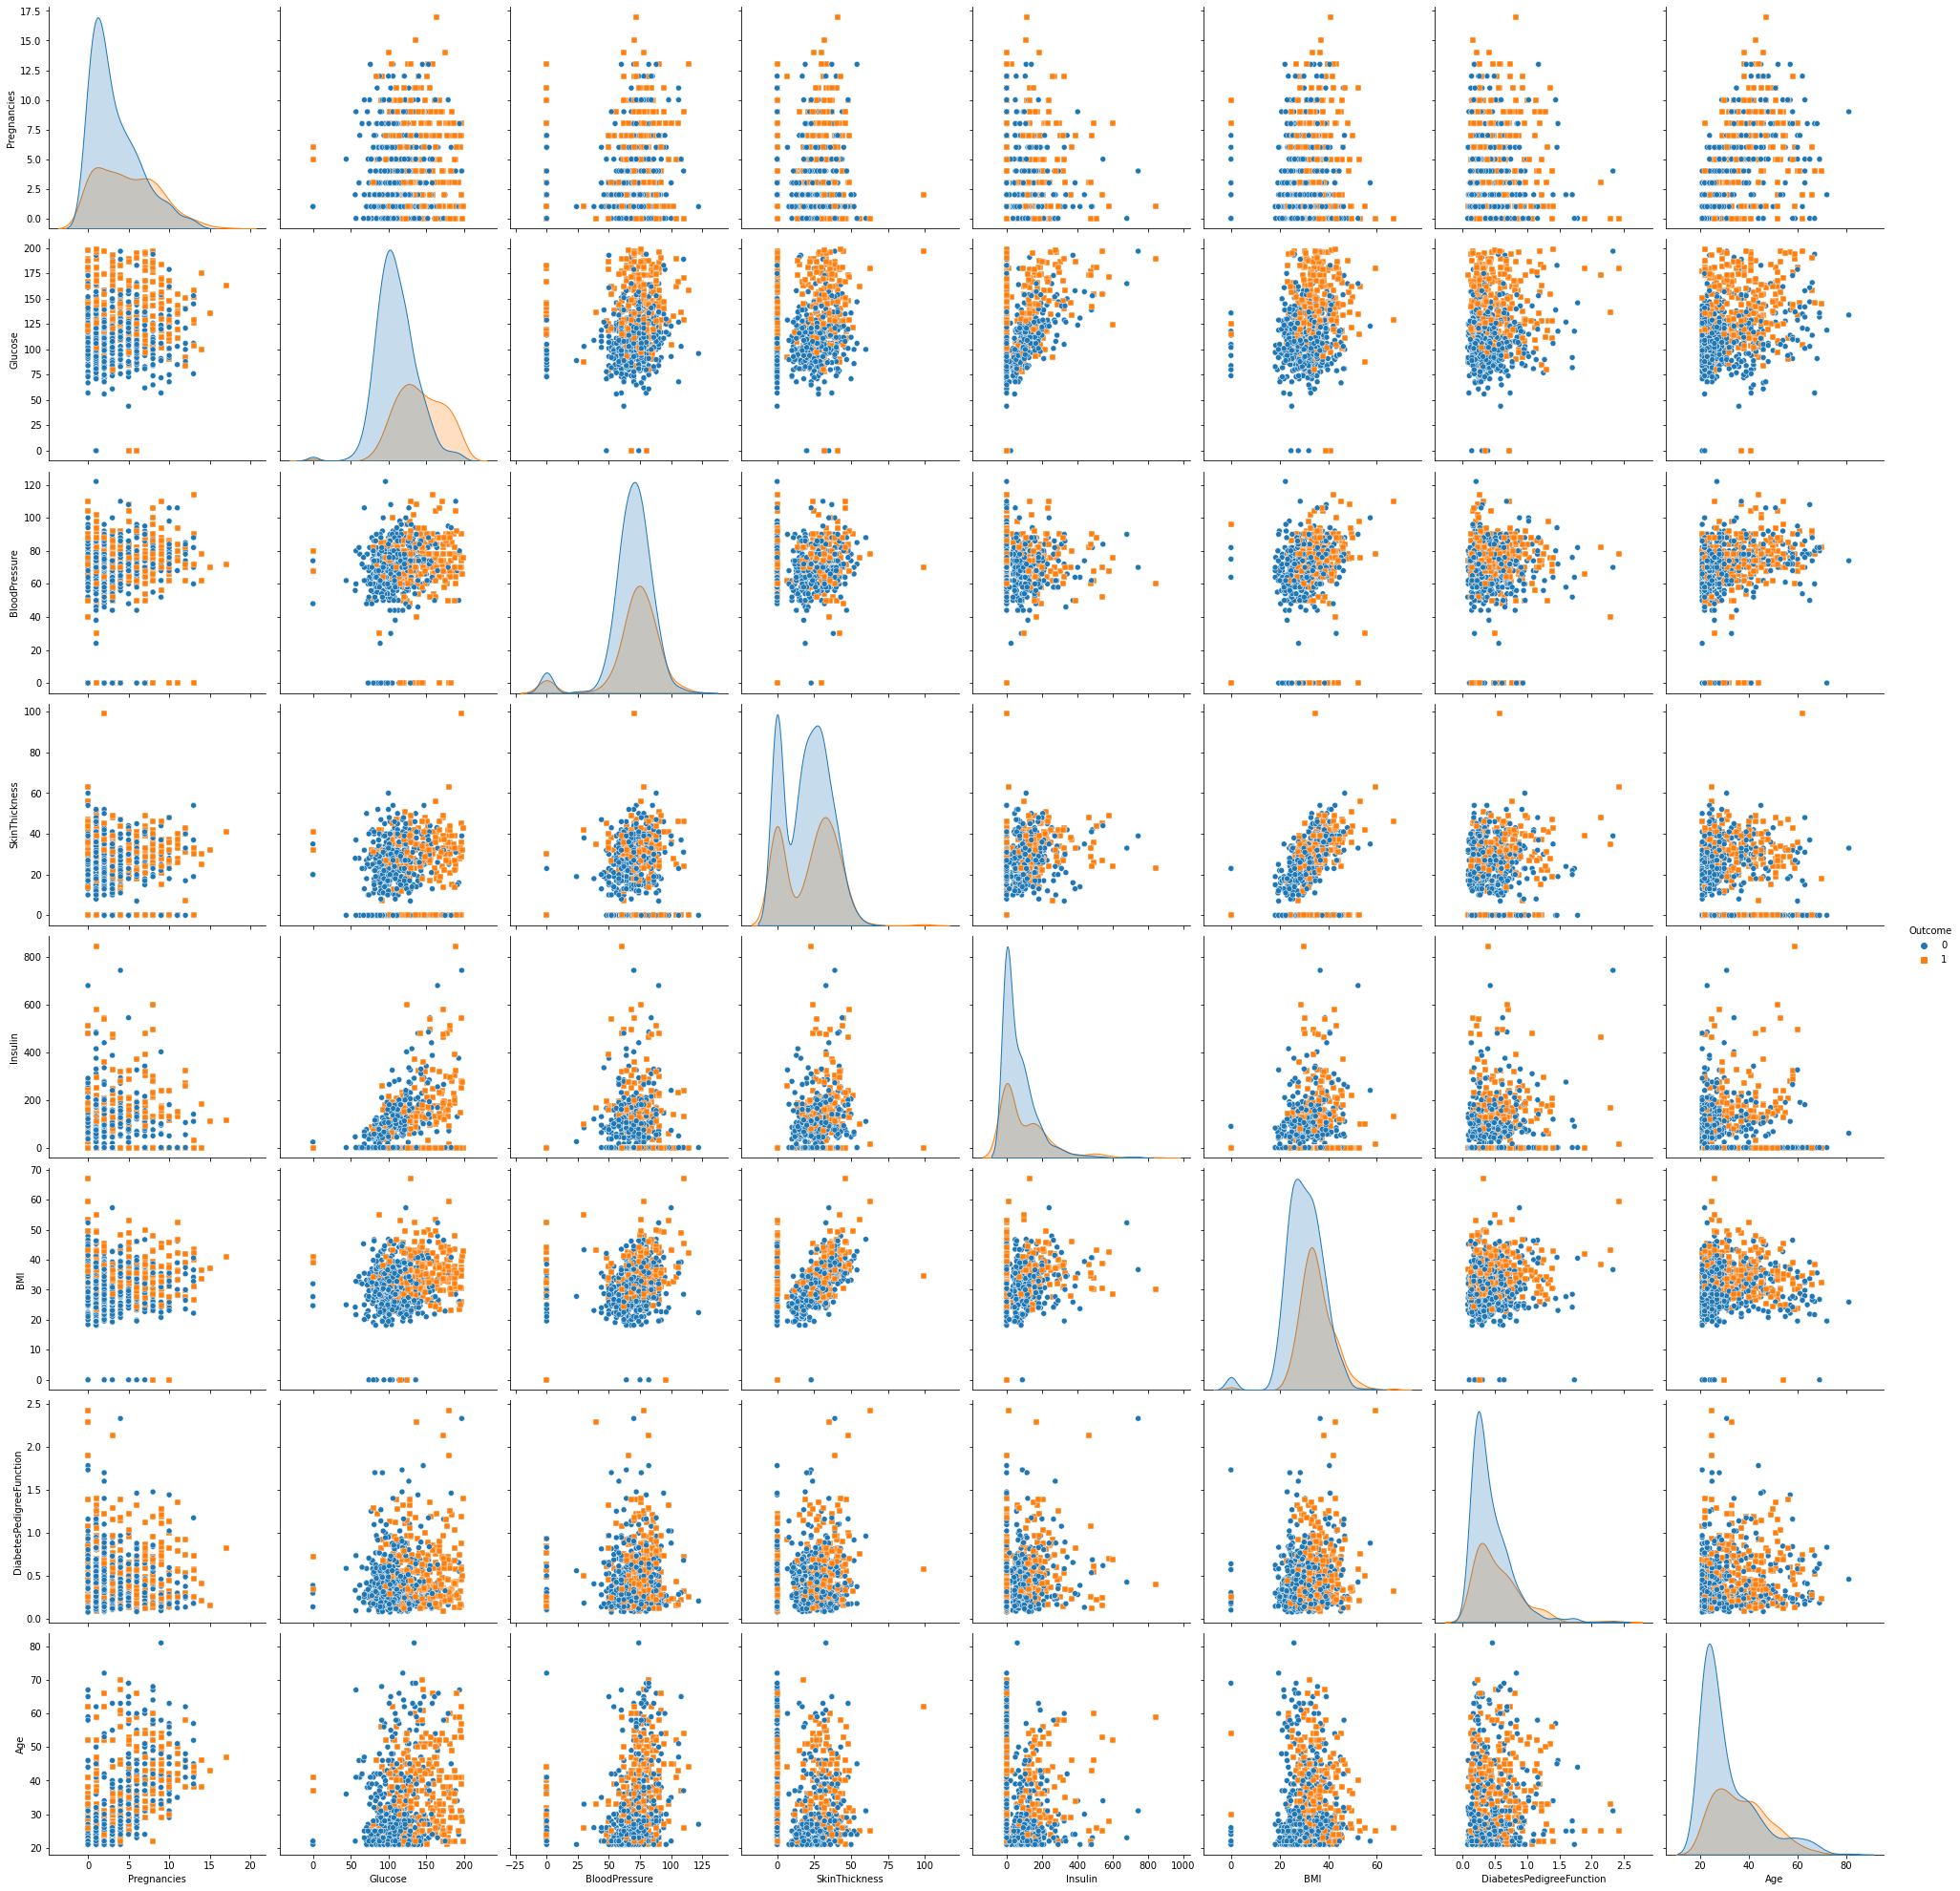

In [5]:
sns.pairplot(df, hue='Outcome',  markers=["o", "s"], height=3.5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# df = df.dropna(axis=1)

In [10]:
df.shape

(768, 9)

In [5]:
X = df.iloc[:,:-1]

In [6]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [49]:
corr = X.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<AxesSubplot:>

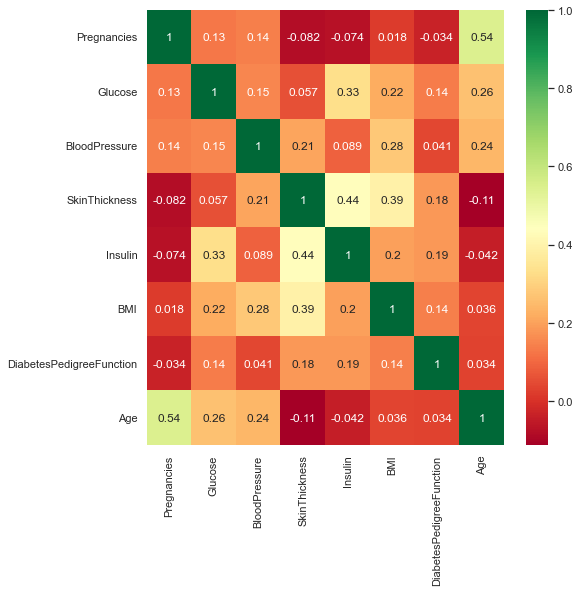

In [53]:
top_corr_features=corr.index 
plt.figure(figsize=(8,8))
#plot heat map 
sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
y = df.iloc[:, -1]

In [14]:
type(y)

pandas.core.series.Series

In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Cnverting target y to numpy array

In [16]:
y = y.values

In [17]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [18]:
type(y)

numpy.ndarray

### Scaling input data into STD range

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [9]:
sX = scaler.transform(X)

In [10]:
sX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [18]:
sX[:,1].shape

(768,)

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

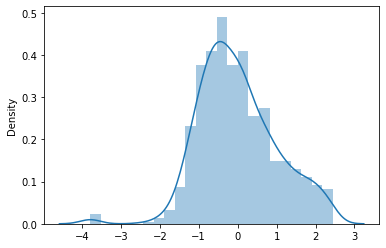

In [23]:
sns.distplot(sX[:,1])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(sX, y, test_size=0.20, random_state=11)

In [24]:
X_train.shape

(614, 8)

In [25]:
X_test.shape

(154, 8)

In [26]:
X_train

array([[ 2.71871250e+00, -4.66156309e-01,  4.62452528e-02, ...,
         2.80164319e-01, -6.67072645e-01,  1.59617091e+00],
       [-8.44885053e-01, -1.31117923e+00,  3.04734002e-01, ...,
         9.41978774e-04, -2.29155437e-01, -9.56461683e-01],
       [ 3.42980797e-01,  2.84975179e-01,  6.66618252e-01, ...,
         9.02068621e-01,  1.46211102e+00,  3.19854614e-01],
       ...,
       [ 4.60143347e-02,  6.58951615e-02,  5.63222752e-01, ...,
         9.41978774e-04, -8.72098593e-02,  6.45913543e-02],
       [-2.50952128e-01, -2.47076292e-01, -1.29789624e+00, ...,
        -1.21748278e+00, -1.00230582e+00, -9.56461683e-01],
       [-5.47918591e-01,  2.53678033e-01, -3.57259724e+00, ...,
         8.25917074e-01, -5.07006355e-01,  6.60205626e-01]])

### Creating Machine Learning Model and Training Model to Predict the Outcome

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=16)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [30]:
prediction = knn.predict(X_test)

In [31]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Measuring Model Accurecy

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
knn_accuracy = round((accuracy_score(y_test, prediction) * 100), 2)

In [34]:
print(str(knn_accuracy) + '%')

75.32%


###Selecting best K value or n_neighbors

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
accuracy =[]
for num in range(5, 25):
  knn = KNeighborsClassifier(n_neighbors=num)
  acc= cross_val_score(knn, X, y, cv=20)
  accuracy.append(acc.mean()*100) #1-acc.mean()

In [37]:
for ix, val in enumerate(accuracy, start=5):
  print(ix, val)

5 72.29419703103913
6 73.46828609986505
7 74.12280701754386
8 73.85964912280701
9 73.85964912280703
10 74.11605937921728
11 73.85964912280703
12 75.02699055330633
13 75.29689608636978
14 75.67476383265857
15 75.03036437246963
16 76.6025641025641
17 75.82658569500674
18 76.72739541160594
19 75.45883940620783
20 75.82995951417003
21 74.93252361673413
22 75.83333333333333
23 74.80431848852899
24 74.91902834008096


### Testing Accurecy of KNN Model using "confusion_matrix", and "classification_report":

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)

[[91  9]
 [29 25]]


In [40]:
print(conf_matrix.shape)

(2, 2)


#### Ploting Confusion Matrix
Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:>

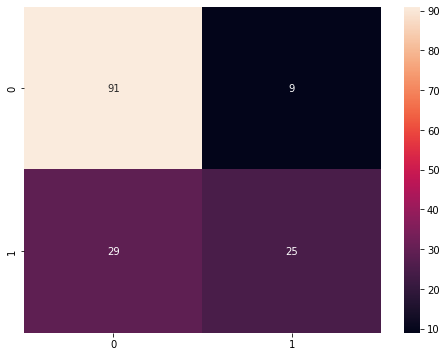

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True)

In [43]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.74      0.46      0.57        54

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154



In [44]:
# y.unique()
# y.value_counts()

c:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


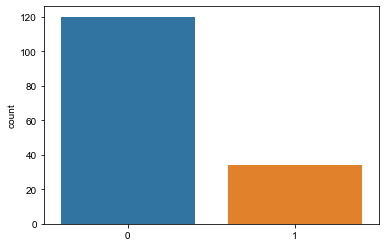

In [45]:
sns.countplot(prediction)
sns.set(style="darkgrid")

### Predicting over individual input

In [46]:
input1 = X.iloc[[7]]
input1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
7,10,115,0,0,0,35.3,0.134,29


In [47]:
x1 = scaler.fit_transform(input1)

In [48]:
out1 = knn.predict(x1)
print(out1)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Manually Checking Our Model Accurecy

In [ ]:
df.loc[(df['DiabetesPedigreeFunction']==0.134) & (df['BMI']==35.3)]